A série histórica de cotações traz todo o histórico de preços dos títulos negociados na Bolsa desde 1986.
As cotações são fornecidas na moeda e forma de cotação da época, sem nenhum ajuste para a inflação ou proventos (dividendos, bonificações, direitos de subscrição, etc.) distribuídos pelas empresas emissoras.
O arquivo contém as informações das cotações históricas relativas à negociação de todos os papéis-mercado no período.


Esse produto contempla as principais informações dos ativos, como: nome e código da empresa, código da ação, código ISIN, tipo de mercado (a vista, termo, opções), especificação (ON/PN), preços (anterior, abertura, mínimo, médio, máximo, fechamento), quantidade de negócios e volume negociado com o papel, dentre outros dados disponíveis. 


In [1]:
import pandas as pd


In [5]:
## Séries históricas disponíveis em
## http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/
arquivo_b3 = ("C:/Users/Heber Castro/Desktop/COTAHIST_D19102022.TXT")



## Estrutura do arquivo disponível em 
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf

tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

dados_acoes=pd.read_fwf(arquivo_b3, widths=tamanho_campos, header=0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Heber Castro/Desktop/COTAHIST_D19102022.TXT'

In [11]:
## Nomear as colunas

dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]

In [5]:
dados_acoes.head()

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20221019,34.0,MMMC34,10,3M,DRN,NaN,R$,152.10,...,33.0,222.0,3.363538e+04,0.0,0.0,99991231.0,1.0,0.0,BRMMMCBDR000,142.0
1,1,20221019,2.0,RRRP3,10,3R PETROLEUM,ON NM,NaN,R$,41.62,...,19239.0,6045800.0,2.621898e+08,0.0,0.0,99991231.0,1.0,0.0,BRRRRPACNOR5,100.0
2,1,20221019,96.0,RRRP3F,20,3R PETROLEUM,ON NM,NaN,R$,41.60,...,1583.0,23678.0,1.027282e+06,0.0,0.0,99991231.0,1.0,0.0,BRRRRPACNOR5,100.0
3,1,20221019,2.0,TTEN3,10,3TENTOS,ON NM,NaN,R$,12.86,...,3933.0,1459700.0,1.882312e+07,0.0,0.0,99991231.0,1.0,0.0,BRTTENACNOR0,101.0
4,1,20221019,96.0,TTEN3F,20,3TENTOS,ON NM,NaN,R$,13.28,...,143.0,3249.0,4.188696e+04,0.0,0.0,99991231.0,1.0,0.0,BRTTENACNOR0,101.0


In [12]:
dados_acoes['tipo_mercado'].unique()

array([10, 20, 70, 80, 30, 12], dtype=int64)

In [13]:
# Alguns tipos de mercado

# 10 - Mercado à vista
# 70 - Opções de Compra
# 80 - Opções de Venda

dados_acoes[dados_acoes['tipo_mercado']==70]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
1659,1,20221019,78.0,ABEVL160,70,ABEVE,ON,0.0,R$,0.63,...,16.0,10500.0,6318.0,15.39,0.0,20221216.0,1.0,0.0,BRABEVACNOR1,123.0
1661,1,20221019,78.0,ABEVB15,70,ABEV,ON,0.0,R$,1.43,...,1.0,500.0,715.0,14.47,0.0,20230217.0,1.0,0.0,BRABEVACNOR1,124.0
1662,1,20221019,78.0,ABEVL161,70,ABEV FM,ON,0.0,R$,0.51,...,26.0,16600.0,8098.0,15.64,0.0,20221216.0,1.0,0.0,BRABEVACNOR1,124.0
1663,1,20221019,78.0,ABEVL154,70,ABEVE,ON,0.0,R$,0.85,...,6.0,2000.0,1623.0,14.89,0.0,20221216.0,1.0,0.0,BRABEVACNOR1,124.0
1664,1,20221019,78.0,ABEVL214,70,ABEVE,ON,0.0,R$,0.02,...,1.0,10000.0,200.0,20.89,0.0,20221216.0,1.0,0.0,BRABEVACNOR1,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10031,1,20221019,78.0,YDUQL130,70,YDUQ FM,ON NM,0.0,R$,1.69,...,5.0,13900.0,17949.0,13.00,0.0,20221216.0,1.0,0.0,BRYDUQACNOR3,103.0
10032,1,20221019,78.0,YDUQL135,70,YDUQ FM,ON NM,0.0,R$,1.05,...,3.0,30000.0,32700.0,13.50,0.0,20221216.0,1.0,0.0,BRYDUQACNOR3,103.0
10033,1,20221019,78.0,YDUQL140,70,YDUQ FM,ON NM,0.0,R$,1.00,...,4.0,9900.0,9238.0,14.00,0.0,20221216.0,1.0,0.0,BRYDUQACNOR3,103.0
10034,1,20221019,78.0,YDUQL145,70,YDUQ FM,ON NM,0.0,R$,0.99,...,11.0,29400.0,23223.0,14.50,0.0,20221216.0,1.0,0.0,BRYDUQACNOR3,103.0


In [40]:
import matplotlib.pyplot as plt

dados_acoes[(dados_acoes['tipo_mercado']==10)&(dados_acoes['cod_negociacao']=='ABEV3')][['data_pregao','preco_ultimo_negocio']]

,data_pregao,preco_ultimo_negocio
70,20221019,14.89


In [41]:
dados_acoes[(dados_acoes['tipo_mercado']==70)&dados_acoes['cod_negociacao'].str.contains("ABEV")&(dados_acoes['numero_negocios']>100)]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
1691,1,20221019,78.0,ABEVJ150,70,ABEV,ON,0.0,R$,0.14,...,278.0,1060400.0,107465.0,15.00,0.0,20221021.0,1.0,0.0,BRABEVACNOR1,125.0
1692,1,20221019,78.0,ABEVJ155,70,ABEV,ON,0.0,R$,0.02,...,156.0,276900.0,4764.0,15.50,0.0,20221021.0,1.0,0.0,BRABEVACNOR1,125.0
1709,1,20221019,78.0,ABEVK147,70,ABEV FM,ON,0.0,R$,0.66,...,123.0,540500.0,375021.0,14.75,0.0,20221118.0,1.0,0.0,BRABEVACNOR1,125.0
1722,1,20221019,78.0,ABEVK150,70,ABEVE,ON,0.0,R$,0.57,...,248.0,490300.0,273133.0,15.00,0.0,20221118.0,1.0,0.0,BRABEVACNOR1,125.0
1723,1,20221019,78.0,ABEVK155,70,ABEVE,ON,0.0,R$,0.34,...,133.0,184600.0,63783.0,15.50,0.0,20221118.0,1.0,0.0,BRABEVACNOR1,125.0


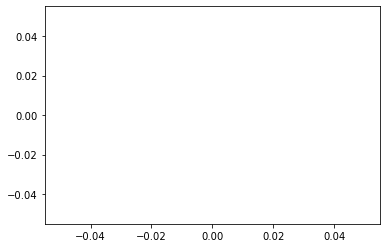

In [42]:
plt.plot(dados_acoes[(dados_acoes['tipo_mercado']==70)&(dados_acoes['cod_negociacao']=='RRRP3T')]['preco_ultimo_negocio'])